In [1]:
import os 
import json 
import pandas as pd 
import numpy as np

In [2]:
home = os.getcwd()
main = os.path.join(home,'Main_Result')
supp = os.path.join(home,'Supplementary_Result')

In [3]:
main_files = [ os.path.join(main,i) for i in os.listdir(main) if i != 'Base.csv' and i != 'Avg.csv'  and i.endswith('.csv')]
Base_file = os.path.join(main,'Base.csv')

In [4]:
df = pd.read_csv(main_files[0],index_col=[0])
df.columns

Index(['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)',
       'Equivalent CO2 Emission (mg)'],
      dtype='object')

In [5]:
Avg_Dict = dict()
for curr_file in main_files:
    df = pd.read_csv(curr_file,index_col=[0])
    print(df.columns)
    df = df.sort_values(by='Energy Used (J)',ascending=True)
    df = df.sort_values(by='Accuracy',ascending=False)
    df = df[:10]
    Key = list(df['ID'])[0][:3]
    Inner_Dict = {'Keys' : list(df['ID'])}
    df_cols = list(df.columns)
    try:df_cols.remove('ID')
    except: print('ID not there')
    for curr_col in df_cols:
        Inner_Dict[f'Avg {curr_col.strip()}'] = np.average(df[curr_col])

    Avg_Dict[Key] = Inner_Dict

Index(['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)',
       'Equivalent CO2 Emission (mg)'],
      dtype='object')
Index(['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)',
       'Equivalent CO2 Emission (mg)'],
      dtype='object')
Index(['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)',
       'Equivalent CO2 Emission (mg)'],
      dtype='object')
Index(['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)',
       'Equivalent CO2 Emission (mg)'],
      dtype='object')
Index(['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)',
       'Equivalent CO2 Emission (mg)'],
      dtype='object')
Index(['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)',
       'Equivalent CO2 Emission (mg)'],
      dtype='object')


In [6]:
new_df = pd.DataFrame(data=Avg_Dict).T
new_df.to_csv(os.path.join(main,'Avg.csv'))

Bat.csv


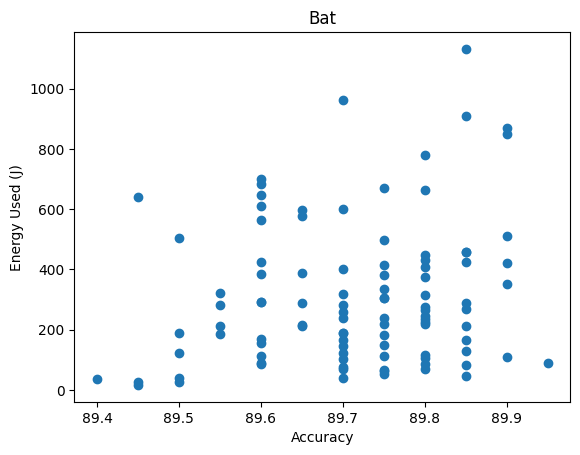

Camel Algorithm.csv


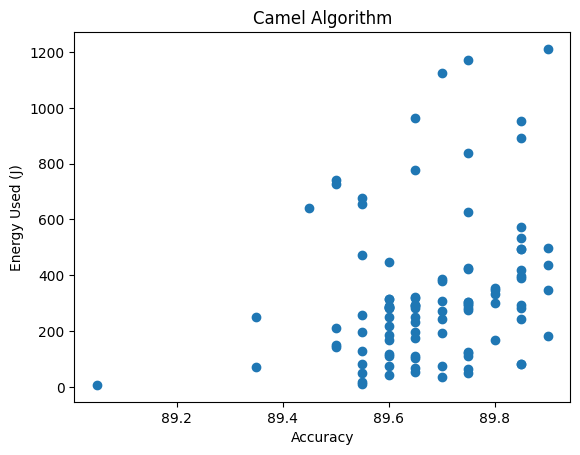

Cuckoo Search.csv


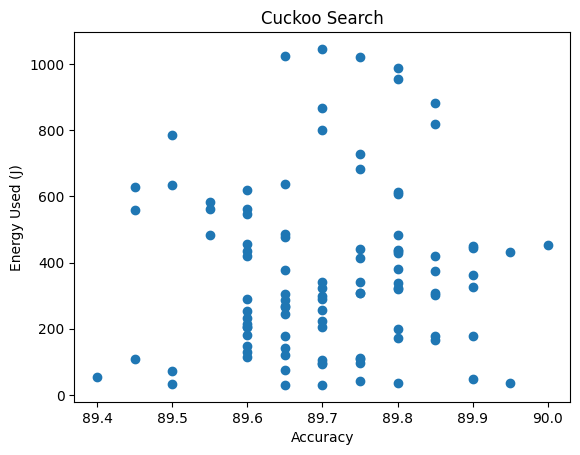

Fire Fly.csv


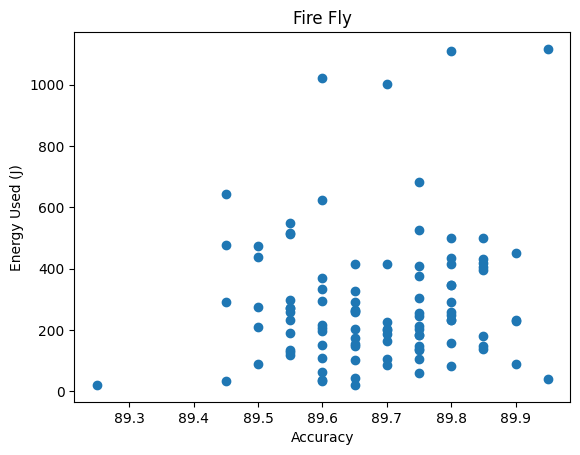

Particle Swarm.csv


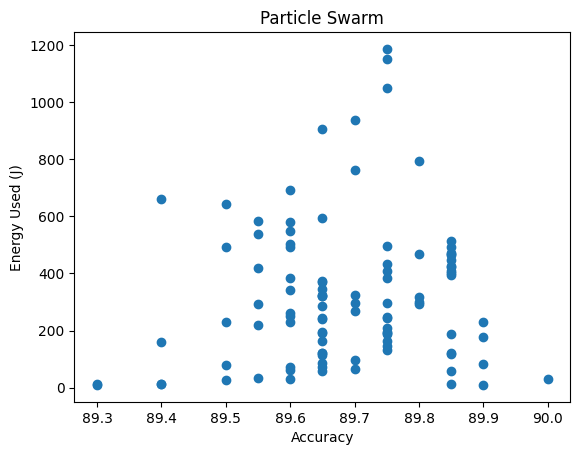

Self Adaptive Bat.csv


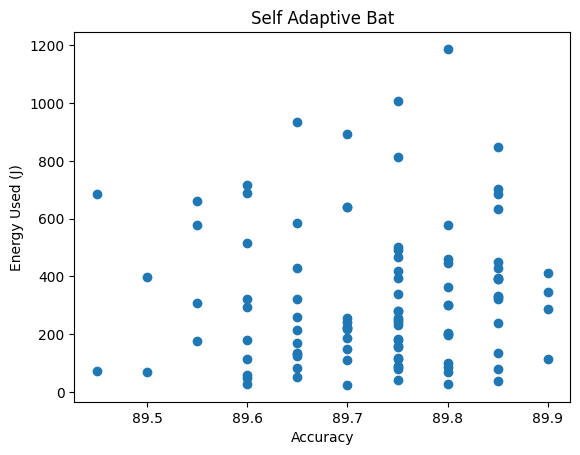

In [7]:
from matplotlib import pyplot as plt 
try:
    os.mkdir('Extra')
except:
    pass
extra = os.path.join(home,'Extra')
for i in main_files:
    df = pd.read_csv(i,index_col=[0])
    df = df.sort_values(by='Energy Used (J)',ascending=True)
    df = df.sort_values(by='Accuracy',ascending=False)
    print(os.path.basename(i))
    plt.close()
    plt.plot(df['Accuracy'],df['Energy Used (J)'],'o')
    plt.xlabel('Accuracy')
    plt.ylabel('Energy Used (J)')
    plt.title(os.path.basename(i).split('.')[0])
    plt.savefig(os.path.join(extra,f"{os.path.basename(i).split('.')[0]} Energy Vs Accuracy.svg"))
    plt.show()


In [15]:
df = pd.read_csv(os.path.join(main,'Avg.csv'),index_col=[0])
print(df.columns)
'''
accuracy = df[['Avg Accuracy']].T
energy = df[['Avg Energy Used (J)']].T
sns.catplot(
        #x='Avg Accuracy',
        #y='',
        data=accuracy, 
        kind='bar',
        height=5,
        aspect=7)
''' 
df = df[['Avg Accuracy','Avg Energy Used (J)', 'Keys','Avg Equivalent CO2 Emission (mg)']]
df['Avg Accuracy'] = round(df['Avg Accuracy'],3)
df['Avg Equivalent CO2 Emission (mg)'] = round(df['Avg Equivalent CO2 Emission (mg)'],3)
df['Avg Energy Used (J)'] = round(df['Avg Energy Used (J)'],3)
df['Keys'] = df['Keys'].keys()
print(df['Keys'])

Index(['Keys', 'Avg Accuracy', 'Avg Time Taken (s)', 'Avg Energy Used (J)',
       'Avg Equivalent CO2 Emission (mg)'],
      dtype='object')
BAT    BAT
CAM    CAM
CUC    CUC
FIR    FIR
PAR    PAR
SEL    SEL
Name: Keys, dtype: object


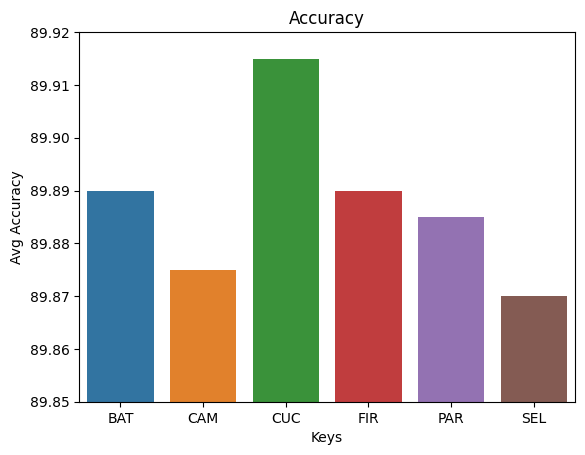

In [9]:
# Import module
import matplotlib.pyplot as plt
import seaborn as sns

df = df[['Avg Accuracy','Avg Energy Used (J)', 'Keys']]
plt.close()
# depict visualization
fig, ax = plt.subplots()
sns.barplot(x=df['Keys'],y=df['Avg Accuracy'], ax=ax)
#sns.barplot(data, ax=ax)
#ax.set_xlim(89, 91)
ax.set_ylim(89.85, 89.92)
plt.title('Accuracy')
plt.savefig(os.path.join(extra,'Accuracy.svg'),format='svg')
plt.show()



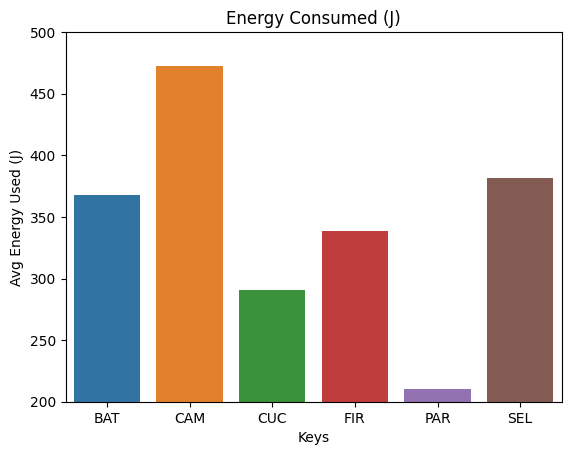

BAT    367.99
CAM    472.47
CUC    290.46
FIR    338.48
PAR    209.94
SEL    381.87
Name: Avg Energy Used (J), dtype: float64


In [20]:
plt.close()
# depict visualization
fig, ax = plt.subplots()
sns.barplot(x=df['Keys'],y=df['Avg Energy Used (J)'], ax=ax)
#sns.barplot(data, ax=ax)
#ax.set_xlim(89, 91)
ax.set_ylim(200,500)
plt.title('Energy Consumed (J)')
plt.savefig(os.path.join(extra,'Energy Consumed.svg'),format='svg')
plt.show()
print(df['Avg Energy Used (J)'])

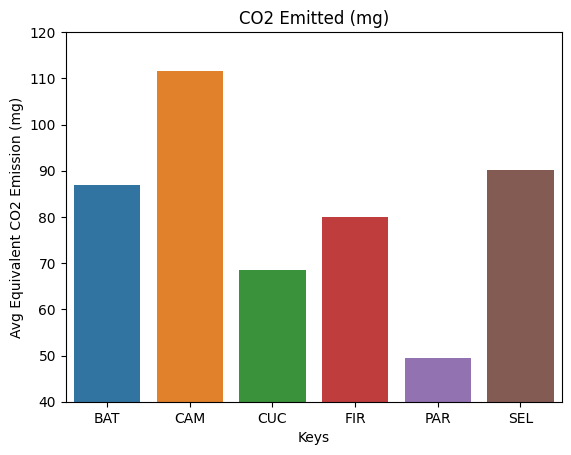

BAT     86.887
CAM    111.555
CUC     68.581
FIR     79.919
PAR     49.569
SEL     90.164
Name: Avg Equivalent CO2 Emission (mg), dtype: float64


In [19]:
plt.close()
# depict visualization
fig, ax = plt.subplots()
sns.barplot(x=df['Keys'],y=df['Avg Equivalent CO2 Emission (mg)'], ax=ax)
#sns.barplot(data, ax=ax)
#ax.set_xlim(89, 91)
ax.set_ylim(40,120)
plt.title('CO2 Emitted (mg)')
plt.savefig(os.path.join(extra,'CO2 Emitted.svg'),format='svg')
plt.show()
print(df['Avg Equivalent CO2 Emission (mg)'])

BAT    0.244273
CAM    0.190224
CUC    0.309561
FIR    0.265570
PAR    0.428146
SEL    0.235342
dtype: float64


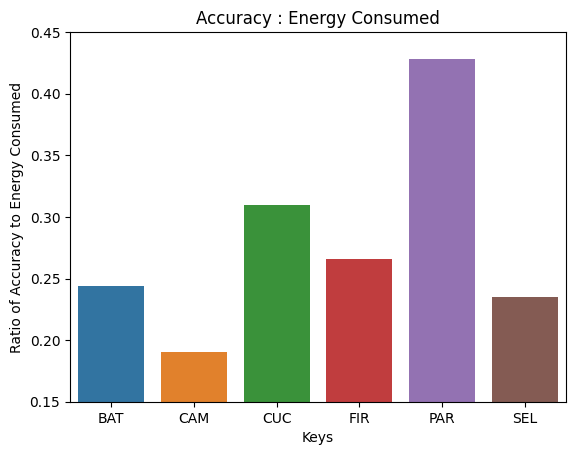

In [26]:
plt.close()
# depict visualization
fig, ax = plt.subplots()
new_y = df['Avg Accuracy'] / df['Avg Energy Used (J)']
print(new_y)
sns.barplot(x=df['Keys'],y=new_y, ax=ax)
#sns.barplot(data, ax=ax)
#ax.set_xlim(89, 91)
ax.set_ylim(0.15,0.45)
ax.set_ylabel('Ratio of Accuracy to Energy Consumed')
plt.title('Accuracy : Energy Consumed')
plt.savefig(os.path.join(extra,'Accuracy_to_Energy Consumed.svg'),format='svg')
plt.show()

In [215]:
from docx import Document
from docx.shared import Inches

document = Document()

Algos = [ os.path.basename(i)[:-4] for i in main_files]
document.add_paragraph().add_run('The following Algorithms results are present here:-\n').bold = True
for i in Algos:
    document.add_paragraph().add_run(f'{i}\n').bold = True
document.add_page_break()


In [216]:
def Add_Table(df,doc):
    t = doc.add_table(rows=(df.shape[0]+1), cols=df.shape[1])
    t.style = 'TableGrid'
    #print( f'({df.shape[0]+1}, {df.shape[1]})' )

    for i in range(df.shape[1]):
        t.cell(0, i).text = df.columns[i]
        #t.cell(0, i).style = 'bold'
        t.rows[0].cells[i].paragraphs[0].runs[0].font.bold = True

    #t.row_cells[0].font.bold = True
        #t.cell(0, i).font.bold = True
        #run.font.bold = True
        #print( f'(0, {i}) = {t.cell(0, i).text}',end=' ')
    #print('')

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            t.cell(i + 1, j).text = str(df.iat[i, j])
            #print( f'({i+1}, {j}) = {t.cell(i + 1, j).text}',end=' ')
        #print('')
    return doc 

In [217]:
for i in range(len(Algos)):
    document.add_section()
    document.add_paragraph().add_run(f'\t{Algos[i]}\n').bold = True

    df = pd.read_csv(os.path.join(main,f'{Algos[i]}.csv'),index_col=[0])
    document = Add_Table(df,document)
    document.add_paragraph().add_run(f'\n\tT#{i+1}.1 {Algos[i]} Main Result\n').bold = True

    df = pd.read_csv(os.path.join(supp,f'{Algos[i]}_Parameter.csv'),index_col=[0])
    document = Add_Table(df,document)
    document.add_paragraph().add_run(f'\n\tT#{i+1}.2 {Algos[i]} Parameters\n').bold = True

    df = pd.read_csv(os.path.join(supp,f'{Algos[i]}_Energy_Distribution.csv'),index_col=[0])
    document = Add_Table(df,document)
    document.add_paragraph().add_run(f'\n\tT#{i+1}.3 {Algos[i]} Energy Distribution\n').bold = True

    #document.add_picture(os.path.join(supp,f'{Algos[i]}_Iterations.svg'))
    document.add_paragraph().add_run(f'\n\tFig#{i+1} {Algos[i]} Iterations\n').bold = True

    document.add_page_break()

document.save('Supplementary_file.docx')

C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)
C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)
C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)
C:\Users\chand\AppData\Local\Packages\PythonSoftw